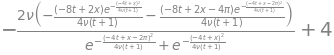

In [62]:
#Burgers' eq



import numpy

#LATEX
#符號計算python庫
import sympy

from sympy import init_printing
from sympy import latex
init_printing(use_latex=True)


x,nu,t = sympy.symbols('x nu t')
#phi = nu*x
phi= (sympy.exp(-(x-4*t)**2/ (4*nu*(t+1))) 
+sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1))))




phiprime = phi.diff(x)

#顯示latex程式碼
#print(latex(phiprime))




from sympy.utilities.lambdify import lambdify

u = -2 * nu *(phiprime/phi) +4
u


#Lambdity: Convert a SymPy expression into a function that allows for fast numeric evaluation.

ufunc = lambdify((t,x,nu),u)
#print(ufunc(1,4,3))

u

0.07798592211502872
un: [0.36363636 0.36934835 0.37506034 0.38077232 0.38648431 0.3921963
 0.39790828 0.40362027 0.40933226 0.41504424 0.42075623 0.42646822
 0.4321802  0.43789219 0.44360418 0.44931616 0.45502815 0.46074014
 0.46645212 0.47216411 0.4778761  0.48358808 0.48930007 0.49501206
 0.50072404 0.50643603 0.51214802 0.51786    0.52357199 0.52928398
 0.53499596 0.54070795 0.54641994 0.55213192 0.55784391 0.5635559
 0.56926788 0.57497987 0.58069186 0.58640384 0.59211583 0.59782782
 0.6035398  0.60925179 0.61496378 0.62067576 0.62638775 0.63209974
 0.63781172 0.64352371 0.6492357  0.65494768 0.66065967 0.66637166
 0.67208364 0.67779563 0.68350762 0.6892196  0.69493159 0.70064358
 0.70635556 0.71206755 0.71777954 0.72349152 0.72920351 0.7349155
 0.74062748 0.74633947 0.75205146 0.75776344 0.76347543 0.76918742
 0.7748994  0.78061139 0.78632338 0.79203536 0.79774735 0.80345934
 0.80917132 0.81488331 0.8205953  0.82630728 0.83201927 0.83773125
 0.84344324 0.84915523 0.85486721 0.86057

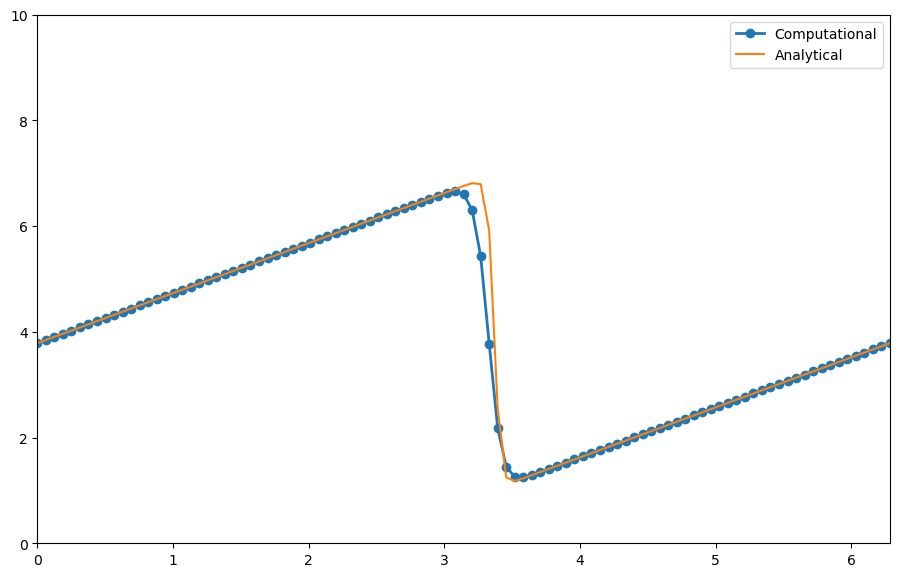

In [114]:
from matplotlib import pyplot 
%matplotlib inline

###variable declaretions
nx = 101   #space 
nt = 100  #time
dx = 2 * numpy.pi /(nx -1)
sigma = 0.01

nu = .07
dt = sigma * dx*dx/nu

print(nu*nu/dx)

x =numpy.linspace(0,2*numpy.pi,nx)

un = numpy.empty(nx)
print('un:',un )
t=0

#Initial condition
u = numpy.asarray([ufunc(t,x0,nu) for x0 in x])
print(u)



#periodic boundary condition


for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]

u_analytical = numpy.asarray([ufunc(nt*dt, xi, nu) for xi in x])
print(u_analytical)
    
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend()




'''
One of the big differences between Step 4 and the previous lessons 
is the use of periodic boundary conditions. 
If you experiment with Steps 1 and 2 and make the simulation run longer (by increasing nt) 
you will notice that the wave will keep moving to the right until it no longer even shows up
in the plot.
'''

In [3]:
import webbrowser
webbrowser.open("https://en.wikipedia.org/wiki/Burgers'_equation")

True